# 将图片在指定图库中转化为马赛克图

In [62]:
import photomosaic as pm
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage.io import imread
from PIL import Image, ImageChops
import numpy as np

In [63]:
image = Image.open('../singapore.png')

In [64]:
background = Image.new("RGB", image.size, (255, 255, 255))
background.paste(image, mask=image.split()[3]) # 3 is the alpha channel
image = background

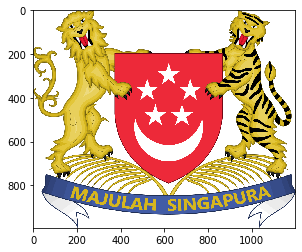

In [53]:
plt.imshow(image)

In [17]:
# Analyze the collection (the "pool") of images.
#pool = pm.make_pool('images/*/*.*')
pool = pm.make_pool('../Frontend/imgs/train/*.*')

analyzing pool: 100%|██████████| 4011/4011 [00:13<00:00, 296.49it/s]


In [36]:
image = pm.standardize_image(image)

In [2]:
# adapt_image = pm.adapt_to_pool(image, pool) # 将图片转化为适合图库的样子,但是实际上并不好

In [54]:
mos = pm.basic_mosaic(image, pool, (100,100), depth=2) # 第三个参数代表将大图分割的大小

drawing mosaic: 100%|██████████| 10306/10306 [00:01<00:00, 6061.92it/s]


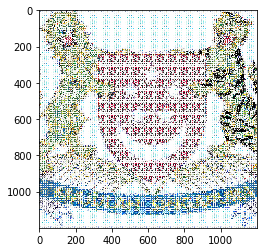

In [55]:
plt.imshow(mos)

In [56]:
imsave('../singapore_mosaic.png', mos) # 保存图片

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [60]:
pm.simple_matcher_unique(pool)

<function photomosaic.photomosaic.simple_matcher_unique.<locals>.match(vector)>

In [75]:
tiles = pm.partition(image, grid_dims=(5, 5))
matches = pm.simple_matcher_unique(pool)
pm.draw_mosaic(image, tiles, matches)

drawing mosaic:   0%|          | 0/25 [00:00<?, ?it/s]


TypeError: zip argument #2 must support iteration

In [67]:
image = pm.standardize_image(image)

In [71]:
image.shape

(995, 1200, 3)